## Project #2 - Linear and Multivariable Regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

...

## Tasks

In [1]:
# Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For splitting the data
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.linear_model import LinearRegression

# For evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the data from the excel file
df = pd.read_excel("LogDataProject_Cleaned_OutliersRemoved.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1059 non-null   float64
 1   DEN     1059 non-null   float64
 2   NEU     1059 non-null   float64
 3   Vp      1059 non-null   float64
dtypes: float64(4)
memory usage: 33.2 KB


### Linear Regression

In [3]:
# Define the target and the features
y = df['Vp']

X1 = df[['Vs']]
X2 = df[['DEN']]
X3 = df[['NEU']]

In [4]:
# Split the data, keep 30% for testing
X1_train, X1_test, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3)
X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3)
X3_train, X3_test, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3)

print ("Training Data", X1_train.shape)
print ("Testing Data", X1_test.shape)
print ("Total Data", df.shape)

Training Data (741, 1)
Testing Data (318, 1)
Total Data (1059, 4)


In [5]:
# Create a Regression object, used to find the optimized coefficients
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()

regressor1.fit(X1_train, y_train1)
regressor2.fit(X2_train, y_train2)
regressor3.fit(X3_train, y_train3)

# Predict the values using the optimized coefficients
y_pred1 = regressor1.predict(X1_test)
y_pred2 = regressor2.predict(X2_test)
y_pred3 = regressor3.predict(X3_test)


#### Model Evaluation

In [6]:
# Vs

# Calculate the mean squared error
mse = mean_squared_error(y_test1, y_pred1) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Calculate the r-squared
r2 = r2_score(y_test1, y_pred1)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2)

Mean Squared Error: 0.03469782662398788
Root Mean Squared Error: 0.18627352636375327
R-Square: 0.7266827756623431


In [7]:
# DEN

# Calculate the mean squared error
mse = mean_squared_error(y_test2, y_pred2) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))

# Calculate the r-squared
r2 = r2_score(y_test2, y_pred2)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2)

Mean Squared Error: 0.053386137284378146
Root Mean Squared Error: 0.2310544033001279
R-Square: 0.5871224762233229


In [8]:
# NEU

# Calculate the mean squared error
mse = mean_squared_error(y_test3, y_pred3) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test3, y_pred3))

# Calculate the r-squared
r2 = r2_score(y_test3, y_pred3)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.02830945990939026
Root Mean Squared Error: 0.16825415272554273
R-Square: 0.7711874183010794


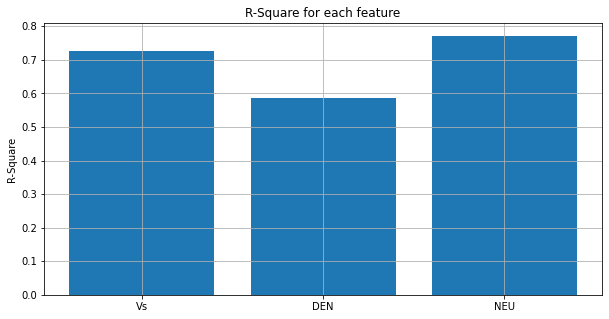

In [9]:
plt.figure(figsize=(10,5))
plt.bar(['Vs','DEN','NEU'], [r2_score(y_test1, y_pred1), r2_score(y_test2, y_pred2), r2_score(y_test3, y_pred3)])
plt.ylabel('R-Square')
plt.title('R-Square for each feature')
plt.grid()
plt.show()

**Comment**
From the bar plot we can see that NEU has the highest R2 score, this means that the model using NEU is the most accurate model.
When calculating the Uniaxial Compressive Strength in the next task, this model will be used.

#### Calculating Uniaxial Compressive Strenght With The Best Model

In [10]:
# Formula for computing the Uniaxial Compressive Strength (Co)
def compute_C0(Vp):
    return 0.77 * Vp**2.92

In [11]:
# My model is: Vp = 4.94 - 5.24 * NEU
def compute_Vp_using_NEU(NEU):
    return regressor3.intercept_ + regressor3.coef_ * NEU

In [12]:
C0_true = compute_C0(np.array(y_test3))
C0_pred = compute_C0(compute_Vp_using_NEU(np.array(X3_test)))

# Calculate the R2
r2 = r2_score(C0_true, C0_pred)
print('R-Square:', r2)

R-Square: 0.7625119124038473


**Comment:**
The R2 score for our model is 0.76, this is means that the model captures 76% of the variance in the data, this is a substantial level of predictive capability.

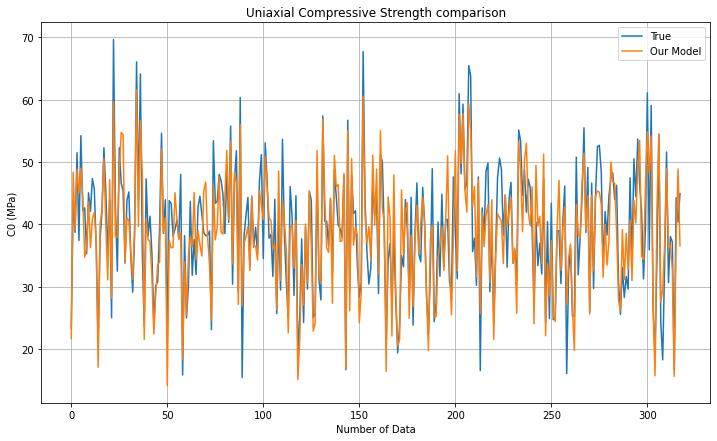

In [13]:
plt.figure(figsize=(12,7))
plt.plot(C0_true)
plt.plot(C0_pred)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['True','Our Model'])
plt.grid()
plt.show()

#### Comparing My Model using (Vs) against Castagna [1]

In [14]:
# Castanga model Vp = 1.16 * Vs + 1.36 [1]
def castagna(Vs):
    return 1.16 * Vs + 1.36

In [15]:
# My model based on data from the north sea: Vp = 0.57 + 1.59 * Vs
def compute_Vp_using_Vs(Vs):
    return regressor1.intercept_ + regressor1.coef_ * Vs

In [16]:
C0_castagna = compute_C0(castagna(np.array(X1_test)))
C0_mymodel = compute_C0(compute_Vp_using_Vs(np.array(X1_test)))
C0_true = compute_C0(np.array(y_test1))
# Calculate the R2
r2_castagna = r2_score(C0_true, C0_castagna)
r2_mymodel = r2_score(C0_true, C0_mymodel)

print('R-Square for Castagna:',r2_castagna )
print('R-Square for Our Model:',r2_mymodel )


R-Square for Castagna: 0.546603099902669
R-Square for Our Model: 0.7184963472122053


**Comment:**

From the R2 results, it is clear that our model, R2 score: 0.72, outperforms the Castagna model, R2 score: 0.55. From the comparison plots, it is shown that our model overlaps more with the true data than the Castagna model.

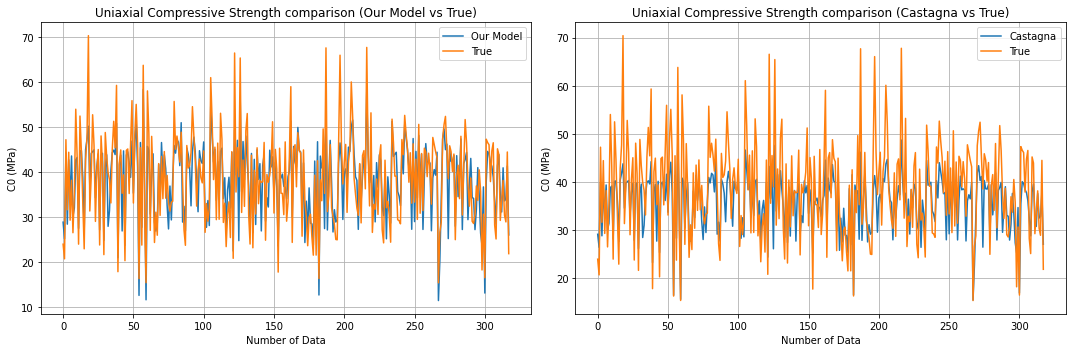

In [17]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5)) 
# Plotting the first set of data (C0_mymodel and C0_true)
axes[0].plot(C0_mymodel, label='Our Model')
axes[0].plot(C0_true, label='True')
axes[0].set_xlabel("Number of Data")
axes[0].set_ylabel("C0 (MPa)")
axes[0].set_title("Uniaxial Compressive Strength comparison (Our Model vs True)")
axes[0].legend()
axes[0].grid()

# Plotting the second set of data (C0_castagna and C0_true)
axes[1].plot(C0_castagna, label='Castagna')
axes[1].plot(C0_true, label='True')
axes[1].set_xlabel("Number of Data")
axes[1].set_ylabel("C0 (MPa)")
axes[1].set_title("Uniaxial Compressive Strength comparison (Castagna vs True)")
axes[1].legend()
axes[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Multivariable Regression

In [82]:
# Features and target variable selection
X1_M = df[['Vs', 'DEN']]
X2_M = df[['Vs', 'NEU']]
X3_M = df[['DEN', 'NEU']]
X4_M = df[['Vs', 'DEN', 'NEU']]
y = df['Vp']

In [83]:
# Split data and keep 30% for testing
X1M_train, X1M_test, y1M_train, y1M_test = train_test_split(X1_M, y, test_size = 0.3)
X2M_train, X2M_test, y2M_train, y2M_test = train_test_split(X2_M, y, test_size = 0.3)
X3M_train, X3M_test, y3M_train, y3M_test = train_test_split(X3_M, y, test_size = 0.3)
X4M_train, X4M_test, y4M_train, y4M_test = train_test_split(X4_M, y, test_size = 0.3)


In [84]:
# Create a Regression object, used to find the optimized coefficients
regressor_1M = LinearRegression()
regressor_2M = LinearRegression()
regressor_3M = LinearRegression()
regressor_4M = LinearRegression()

regressor_1M.fit(X1M_train, y1M_train)
regressor_2M.fit(X2M_train, y2M_train)
regressor_3M.fit(X3M_train, y3M_train)
regressor_4M.fit(X4M_train, y4M_train)

# Predict the values using the optimized coefficients
y1M_pred = regressor_1M.predict(X1M_test)
y2M_pred = regressor_2M.predict(X2M_test)
y3M_pred = regressor_3M.predict(X3M_test)
y4M_pred = regressor_4M.predict(X4M_test)


#### Model Evaluation

In [85]:
# Vs and DEN

# Calculate the mean squared error
mse = mean_squared_error(y1M_test, y1M_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y1M_test, y1M_pred))

# Calculate the r-squared
r2 = r2_score(y1M_test, y1M_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2 )

Mean Squared Error: 0.005560326111006326
Root Mean Squared Error: 0.07456759424177721
R-Square: 0.9438774345913868


In [86]:
# Vs and NEU

# Calculate the mean squared error
mse = mean_squared_error(y2M_test, y2M_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y2M_test, y2M_pred))

# Calculate the r-squared
r2 = r2_score(y2M_test, y2M_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2 )

Mean Squared Error: 0.008214919143874743
Root Mean Squared Error: 0.09063619113728656
R-Square: 0.9401865409308541


In [87]:
# DEN and NEU

# Calculate the mean squared error
mse = mean_squared_error(y3M_test, y3M_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y3M_test, y3M_pred))

# Calculate the r-squared
r2 = r2_score(y3M_test, y3M_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2 )

Mean Squared Error: 0.0315162788914691
Root Mean Squared Error: 0.17752824815073545
R-Square: 0.7566799488268455


In [88]:
# Vs, DEN and NEU

# Calculate the mean squared error
mse = mean_squared_error(y4M_test, y4M_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y4M_test, y4M_pred))

# Calculate the r-squared
r2 = r2_score(y4M_test, y4M_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2 )

Mean Squared Error: 0.006312263391427572
Root Mean Squared Error: 0.07944975387896158
R-Square: 0.9545563919000265


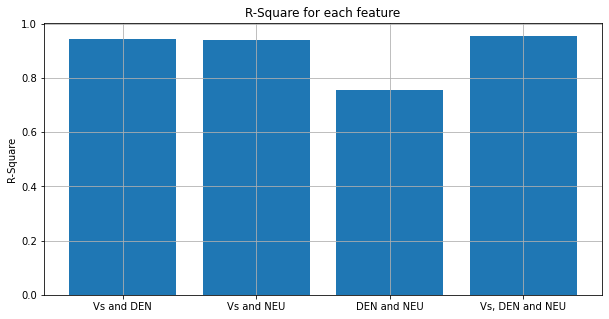

In [89]:
plt.figure(figsize=(10,5))
plt.bar(['Vs and DEN','Vs and NEU','DEN and NEU', 'Vs, DEN and NEU'], [r2_score(y1M_test, y1M_pred), r2_score(y2M_test, y2M_pred), r2_score(y3M_test, y3M_pred), r2_score(y4M_test, y4M_pred) ])
plt.ylabel('R-Square')
plt.title('R-Square for each feature')
plt.grid()
plt.show()

#### Calculating Uniaxial Compressive Strength With The Best Multi Variable Model

In [90]:
C0_multi_variable = compute_C0(y4M_pred)
C0_true = compute_C0(np.array(y4M_test))

# Calculate the R2
r2 = r2_score(C0_true, C0_multi_variable)
print('R-Square:', r2)

R-Square: 0.9516194068918327


**Comment**
Compared to the best Linear Model using NEU that had a R2 of 0.76, this Multi Variable Model is much better with a R2 score of 0.94.

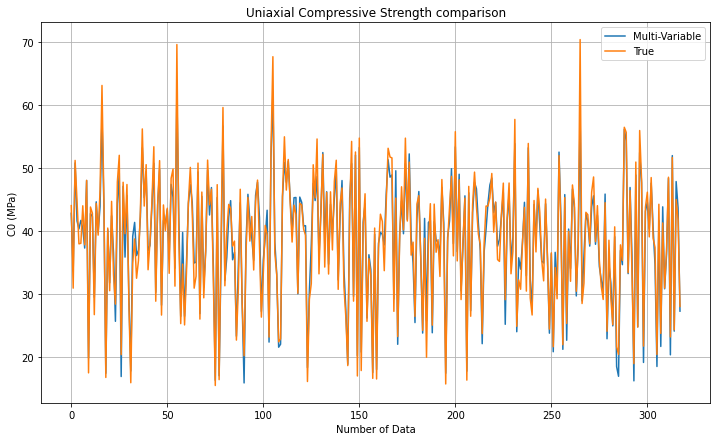

In [91]:
# Plot
plt.figure(figsize=(12,7))
plt.plot(C0_multi_variable)
plt.plot(C0_true)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['Multi-Variable','True'])
plt.grid()
plt.show()

**Comment**
We can see that our Multi Variable Model using all the features overlaps well with the real data.

...

## Discussion and conclusion

In conclusion, this project shows that the multivariable model yields a better prediction of Vp than the linear models. It also shows how R2 can be used to compare models with the true data, to see which model is better.

## Reflections

...

## References
[1]: Castagna, J.P., Batzle, M.L., and Eastwood, R.L., 1985, Relationships between compressional-wave and shear-wave velocitites in clastic silicate rocks: Geophysics, 50, 571-581


...